# Model Evaluation

In [1]:
# Imports + read in files
from pipeline import find_best_model, analyze_best_model
import pandas as pd
import matplotlib.pyplot as plt

reg_df = pd.read_csv('results/evaluation_results/reg-small-grid_ay.csv')
clf_df = pd.read_csv('results/evaluation_results/clf-small-grid_ay.csv')

/home/sinclairtarget/harris/ml/philly-evictions/.venv/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#Look at highest precision across models
clf_14 = clf_df[(clf_df['split']==6) & (clf_df['threshold']==14)]
clf_14.style.apply(
    find_best_model.highlight_max, color='darkorange', subset=['precision','f1','auc','recall',
                                                              'auc','accuracy'])


,accuracy,auc,classifier,f1,parameters,precision,recall,split,threshold
1485,0.93488,0.892404,LR,0.740299,"{'C': 0.01, 'penalty': 'l1'}",0.663102,0.837838,6,14
1488,0.94985,0.930396,LR,0.8,"{'C': 0.01, 'penalty': 'l2'}",0.716578,0.905405,6,14
1491,0.954341,0.941794,LR,0.81791,"{'C': 0.1, 'penalty': 'l1'}",0.73262,0.925676,6,14
1494,0.958832,0.953192,LR,0.835821,"{'C': 0.1, 'penalty': 'l2'}",0.748663,0.945946,6,14
1497,0.928892,0.877207,KNN,0.716418,"{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}",0.641711,0.810811,6,14
1500,0.931886,0.884805,KNN,0.728358,"{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}",0.652406,0.824324,6,14
1503,0.939371,0.903802,KNN,0.758209,"{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}",0.679144,0.858108,6,14
1506,0.942365,0.9114,KNN,0.770149,"{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}",0.68984,0.871622,6,14
1509,0.928892,0.877207,KNN,0.716418,"{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}",0.641711,0.810811,6,14
1512,0.931886,0.884805,KNN,0.728358,"{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}",0.652406,0.824324,6,14


In [3]:
#Create df with the max values for each model at threshold 14%, for each split
clf_max_df = clf_df[clf_df['threshold']==14].drop(['parameters'],axis=1)
clf_max_df['max_f1'] = clf_max_df.groupby(['classifier','split','threshold'])['f1'].transform('max')
clf_max_df['max_precision'] = clf_max_df.groupby(['classifier','split','threshold'])['precision'].transform('max')
clf_max_df['max_auc'] = clf_max_df.groupby(['classifier','split','threshold'])['auc'].transform('max')
clf_max_df['max_recall'] = clf_max_df.groupby(['classifier','split','threshold'])['recall'].transform('max')
clf_max_df['max_accuracy'] = clf_max_df.groupby(['classifier','split','threshold'])['accuracy'].transform('max')
clf_max_df.drop(['accuracy','auc','f1','precision','recall'],axis=1,inplace=True)
clf_max_df = clf_max_df.drop_duplicates()

Text(0, 0.5, 'Precision Value at 14%')

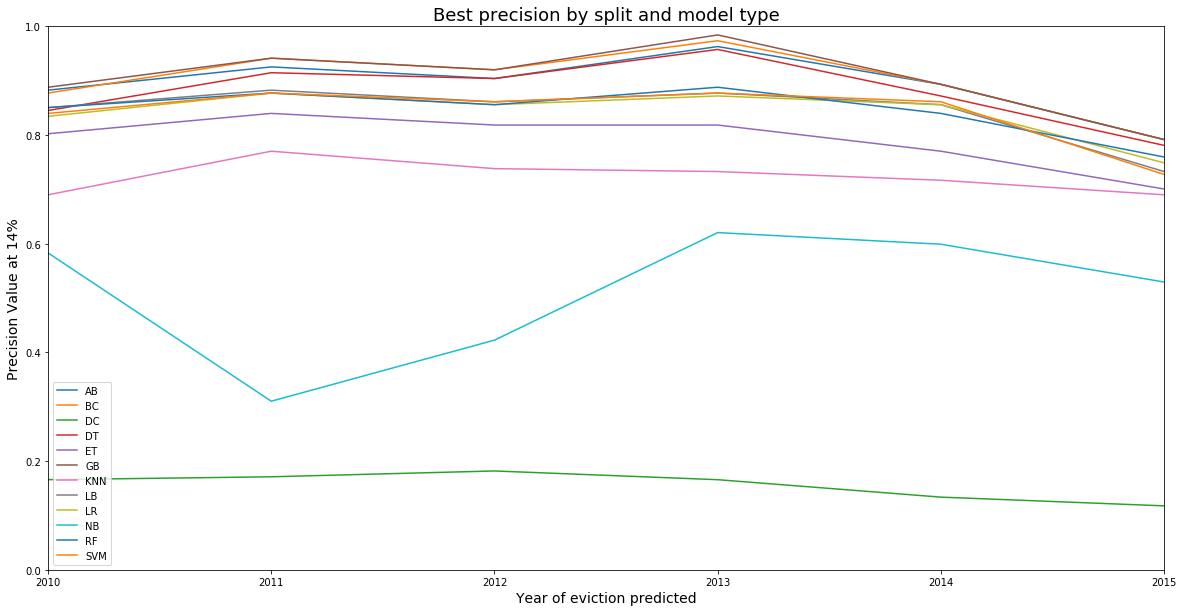

In [4]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for key, grp in clf_max_df.groupby(['classifier']):
    ax = grp.plot(ax=ax, kind='line', x='split', y='max_precision', label=key)

plt.Axes.set_xticklabels(ax, [2010, 2011, 2012, 2013, 2014, 2015])
plt.gca().set_ylim([0,1])
plt.title('Best precision by split and model type',fontsize=18)
plt.xlabel('Year of eviction predicted',fontsize=14)
plt.ylabel('Precision Value at 14%',fontsize=14)

Text(0, 0.5, 'Precision Value at 14%')

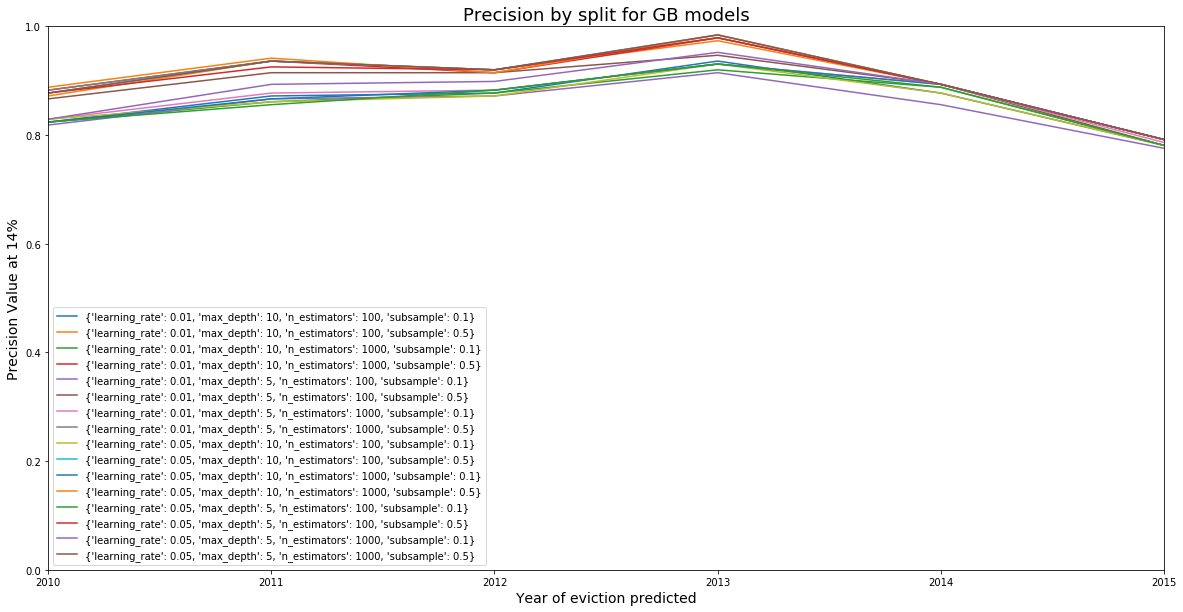

In [5]:
# Create df to look at highest performing model within gradient boosting

clf_gb = clf_df[clf_df['classifier']=='GB']
clf_gb = clf_gb[clf_gb['threshold']==14]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for key, grp in clf_gb.groupby(['parameters']):
    ax = grp.plot(ax=ax, kind='line', x='split', y='precision', label=key)

plt.Axes.set_xticklabels(ax, [2010, 2011, 2012, 2013, 2014, 2015])
plt.gca().set_ylim([0,1])
plt.title('Precision by split for GB models',fontsize=18)
plt.xlabel('Year of eviction predicted',fontsize=14)
plt.ylabel('Precision Value at 14%',fontsize=14)

## Regression output analysis

In [6]:
reg_16 = reg_df[reg_df['split']==6]
reg_16.style.apply(
    find_best_model.highlight_min, color='darkorange', subset=['root_mean_squared_error',
                                                              'mean_squared_error'])
#reg_16.style.apply(
    #find_best_model.highlight_max, color='darkorange', subset=['r2',
                                                         #     'explained_variance'])


,classifier,explained_variance,mean_squared_error,parameters,r2,root_mean_squared_error,split
160,SVR,0.874049,9.4868,{'C': 0.01},0.874032,3.08007,6
161,SVR,0.879941,9.045,{'C': 0.1},0.879898,3.00749,6
162,DTR,0.897402,7.72709,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 2}",0.897398,2.77976,6
163,DTR,0.897402,7.72709,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 5}",0.897398,2.77976,6
164,DTR,0.896184,7.81899,"{'max_depth': 5, 'max_features': None, 'min_samples_split': 10}",0.896177,2.79625,6
165,DTR,0.954066,3.46781,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 2}",0.953953,1.86221,6
166,DTR,0.952896,3.56018,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 5}",0.952727,1.88684,6
167,DTR,0.953974,3.4754,"{'max_depth': 50, 'max_features': None, 'min_samples_split': 10}",0.953853,1.86424,6
168,RFR,0.765283,17.7499,"{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}",0.764312,4.21307,6
169,RFR,0.762141,17.9926,"{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}",0.761089,4.24177,6


In [7]:
#Create df with the max values for each model for each split
reg_max_df = reg_df.drop(['parameters'],axis=1)
reg_max_df['max_r2'] = reg_max_df.groupby(['classifier','split'])['r2'].transform('max')
reg_max_df['max_explained_var'] = reg_max_df.groupby(['classifier','split'])['explained_variance'].transform('max')
reg_max_df['min_rmse'] = reg_max_df.groupby(['classifier','split'])['root_mean_squared_error'].transform('min')
reg_max_df['min_mean_squared_error'] = reg_max_df.groupby(['classifier','split'])['mean_squared_error'].transform('min')
reg_max_df.drop(['explained_variance','r2','mean_squared_error','root_mean_squared_error'],axis=1,inplace=True)
reg_max_df = reg_max_df.drop_duplicates()

Text(0, 0.5, 'RMSE')

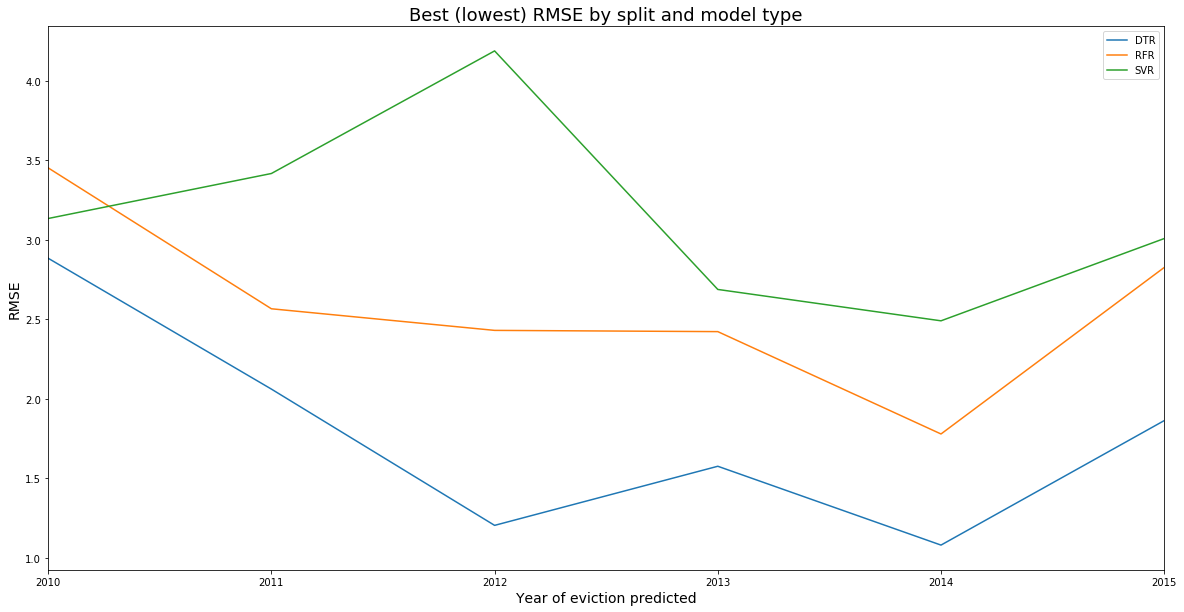

In [8]:
# Plot best RMSE over time for each model
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for key, grp in reg_max_df.groupby(['classifier']):
    ax = grp.plot(ax=ax, kind='line', x='split', y='min_rmse', label=key)

plt.Axes.set_xticklabels(ax, [2010, 2011, 2012, 2013, 2014, 2015])
plt.title('Best (lowest) RMSE by split and model type',fontsize=18)
plt.xlabel('Year of eviction predicted',fontsize=14)
plt.ylabel('RMSE',fontsize=14)

# Interpretation of Best Models
Our baseline is a Logistic Regression classifier with a single feature
(evictions the previous year) and the default parameters.

Our best classifier is a Gradient Boosting with the following parameters:
'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5.
Our best regressor is a Decision Tree with the following parameters:
'max_depth': 50, 'max_features': None, 'min_samples_split': 10.

This notebook produces additional deliverables upon selecting these models.
This includes the following:

For the baseline classifier:
- A "stump" one-level decision tree ('stump.png')``
- The list of the top 14% of selected blocks ('baseline_selected_blocks.csv')
- The precision-recall curves ('baseline_pr_curve.png')

For the best classifier:
- The list of the top 14% selected blocks ('clf_selected_blocks.csv')
- The list of feature importance ('clf_feature_importance.csv')
- The precision-recall curves ('clf_pr_curve.png')

For the best regressor:
- The list of the top 14% selected blocks ('reg_selected_blocks.csv')
- The list of feature importance ('reg_feature_importance.csv')

And to compare the best classifier and best regressor:
- The list of the top 14% blocks based on actual evictions, and the predictions
  yielded from the best classifier and best regressor for these blocks
  ('clf_reg_comparison.csv')

## Environment Setup

In [9]:
from os import path
from IPython.display import Image
import pipeline
from pipeline import clean

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## Pipeline Setup

In [10]:
df = pd.read_csv('data/final_merged_df.csv')
splits = pipeline.split_all_years(df, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]
labeled_splits = [pipeline.label(split, lower_bound=15, drop_column=True)
                  for split in cleaned_splits]

test_year = 2016
splits_dict = {2011:0, 2012:1, 2013:2, 2014:3, 2015: 4, 2016: 5}
train_df, test_df = labeled_splits[splits_dict[test_year]]

## Baseline Classifier
Logistic Regression classifier with a single feature (evictions the previous year) and the default parameters.

In [11]:
params = {}
baseline_model, baseline_scores = pipeline.run_one_clf(
    train_df, test_df, 'LB', params, col_blacklist=['GEOID', 'year_evictions'])

#### "Stump" Decision Tree

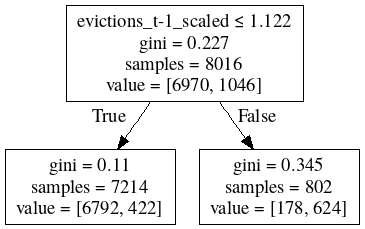

In [12]:
params = {'max_depth': 1}
dtree, dtree_scores = pipeline.run_one_clf(
    train_df, test_df, 'DT', params, col_blacklist=['GEOID', 'year_evictions'])
analyze_best_model.plot_tree(dtree, test_df, 'stump.png', test_year )
Image(filename=path.join('results', str(test_year), 'stump.png'))

#### Selected Blocks

In [13]:
selected_blocks = analyze_best_model.select_k_blocks(baseline_scores, .14 , ['score'], ['GEOID'])
selected_blocks.to_csv(path.join('results', str(test_year), 'baseline_selected_blocks.csv'), index=False)
selected_blocks.head(10)

,GEOID
6215,421010273003
6978,421010301002
8315,421010346001
5389,421010243002
6103,421010268001
8511,421010353021
5711,421010257001
8938,421010373003
8385,421010348021
8658,421010361001


#### Precision-Recall Curves

<Figure size 432x288 with 0 Axes>

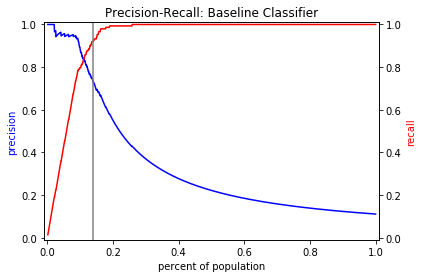

In [14]:
pipeline.plot_precision_recall_n(
    baseline_scores, .14, 'Precision-Recall: Baseline Classifier', 'baseline_pr_curve.png', test_year)

## Best Classifier
Gradient Boosting with the following parameters: 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5.

In [15]:
params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}
best_clf, clf_scores = pipeline.run_one_clf(
    train_df, test_df, 'GB', params, col_blacklist=['GEOID', 'year_evictions'])

#### Selected Blocks

In [16]:
selected_blocks = analyze_best_model.select_k_blocks(clf_scores, .14 , ['score'], ['GEOID'])
selected_blocks.to_csv(path.join('results', str(test_year), 'clf_selected_blocks.csv'), index=False)
selected_blocks.head(10)

,GEOID
8658,421010361001
6215,421010273003
4892,421010206001
3002,421010122012
8679,421010362011
6446,421010279021
8385,421010348021
4304,421010179004
5389,421010243002
5711,421010257001


#### Precision-Recall Curves

<Figure size 432x288 with 0 Axes>

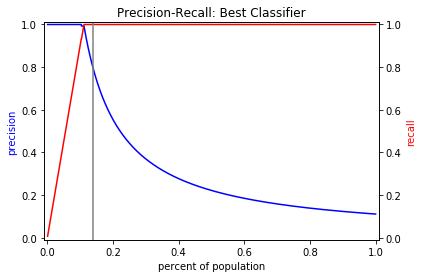

In [17]:
pipeline.plot_precision_recall_n(
    clf_scores, .14, 'Precision-Recall: Best Classifier', 'clf_pr_curve.png', test_year)

#### Feature Importance

In [18]:
importance = analyze_best_model.feature_importance(best_clf, test_df.columns)
importance.to_csv(path.join('results', str(test_year), 'clf_feature_importance.csv'), index=False)
importance.head(10).round(2)

,feature,importance
67,evictions_t-1_scaled,0.49
68,evictions_t-2_scaled,0.17
3,evictions_change_1,0.17
4,evictions_change_2,0.11
69,evictions_t-5_scaled,0.01
5,evictions_change_5,0.01
75,renter_occupied_household_size_scaled,0.00
81,for_rent_units_scaled,0.00
10,for_rent_units_percent,0.00
82,num_af_am_alone_scaled,0.00


## Best Regressor
Decision Tree with the following parameters: 'max_depth': 50, 'max_features':
None, 'min_samples_split': 10.

In [19]:
train_df, test_df = cleaned_splits[splits_dict[test_year]]
params = {'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
best_reg, reg_scores = pipeline.run_one_reg(
    train_df, test_df, 'DTR', params, col_blacklist=['GEOID', 'year_evictions'])

#### Selected Blocks

In [20]:
selected_blocks = analyze_best_model.select_k_blocks(reg_scores, .14 , ['pred_evictions'], ['GEOID'])
selected_blocks.to_csv(path.join('results', str(test_year), 'reg_selected_blocks_clf.csv'), index=False)
selected_blocks.head(10)

,GEOID
6215,421010273003
6978,421010301002
8315,421010346001
5389,421010243002
5711,421010257001
6103,421010268001
3002,421010122012
4892,421010206001
8658,421010361001
8511,421010353021


#### Feature Importance

In [21]:
importance = analyze_best_model.feature_importance(best_reg, test_df.columns)
importance.to_csv(path.join('results', str(test_year), 'reg_feature_importance.csv'), index=False)
importance.head(10).round(2)

,feature,importance
67,evictions_t-1_scaled,0.72
3,evictions_change_1,0.25
68,evictions_t-2_scaled,0.02
69,evictions_t-5_scaled,0.00
5,evictions_change_5,0.00
23,evictions_change_5_binary,0.00
4,evictions_change_2,0.00
8,total_renter_households_percent,0.00
84,num_white_alone_scaled,0.00
21,evictions_change_1_binary,0.00


## Comparing Best Classifier and Best Regressor

In [22]:
comparison = analyze_best_model.clf_reg_comparison(
    best_clf, clf_scores, best_reg, reg_scores, test_df, .14)
comparison.to_csv(path.join('results', str(test_year), 'clf_reg_comparison.csv'), index=False)
comparison.head(10).round(2)

,GEOID,actual_evictions,clf_pred_score,clf_pred_label,reg_pred_evictions
0,421010273003,128.0,1.0,1.0,75.50
1,421010301002,83.0,1.0,1.0,69.33
2,421010361001,78.0,1.0,1.0,51.67
5,421010346001,58.0,1.0,1.0,54.33
3,421010243002,58.0,1.0,1.0,53.38
4,421010268001,58.0,1.0,1.0,53.38
6,421010257001,51.0,1.0,1.0,53.38
7,421010206001,50.0,1.0,1.0,51.67
8,421010353021,49.0,1.0,1.0,44.43
9,421010348021,47.0,1.0,1.0,38.57


# Bias and Fairness
## Setup

In [23]:
import numpy as np
from pipeline import BiasCop

df = pd.read_csv('data/final_merged_df.csv')

splits = pipeline.split_last_year(df, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]

labeled_splits = [pipeline.label(split, lower_bound=14, drop_column=False)
                  for split in cleaned_splits]

train_df, test_df = labeled_splits[-1]

## Classifier Model

In [24]:
params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}
_, clf_pred_df = pipeline.run_one_clf(
    train_df,
    test_df,
    'GB',
    params,
    col_blacklist=['GEOID', 'year_evictions', 'evictions']
)

clf_cop = BiasCop(clf_pred_df)
clf_cop.xtabs()

model_id, score_thresholds 1 {'rank_abs': [0]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,0,majority_demo,af_am_alone,0.0,1.0,0.183953,NaN,0.0,1.0,0.816047,NaN,0,511,NaN,0.0,0,94,417,0,94,417,511,1336,0.183953
1,1,binary 0/1,0,majority_demo,hisp,0.0,1.0,0.087719,NaN,0.0,1.0,0.912281,NaN,0,57,NaN,0.0,0,5,52,0,5,52,57,1336,0.087719
2,1,binary 0/1,0,majority_demo,mixed,0.0,1.0,0.171355,NaN,0.0,1.0,0.828645,NaN,0,391,NaN,0.0,0,67,324,0,67,324,391,1336,0.171355
3,1,binary 0/1,0,majority_demo,white_alone,0.0,1.0,0.047745,NaN,0.0,1.0,0.952255,NaN,0,377,NaN,0.0,0,18,359,0,18,359,377,1336,0.047745


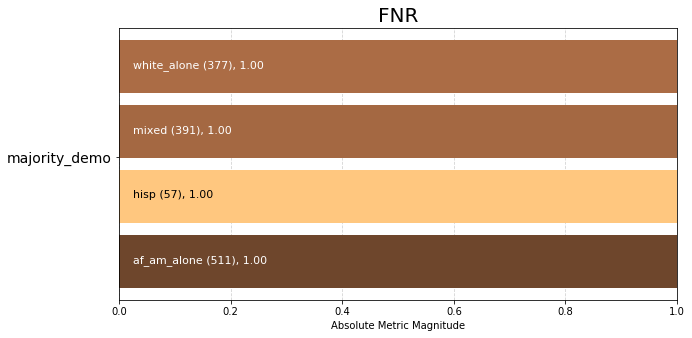

In [25]:
clf_cop.plot_group_metric('fnr')

get_disparity_predefined_group()


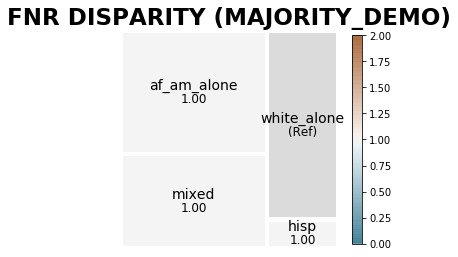

In [26]:
clf_cop.plot_disparity('fnr_disparity')

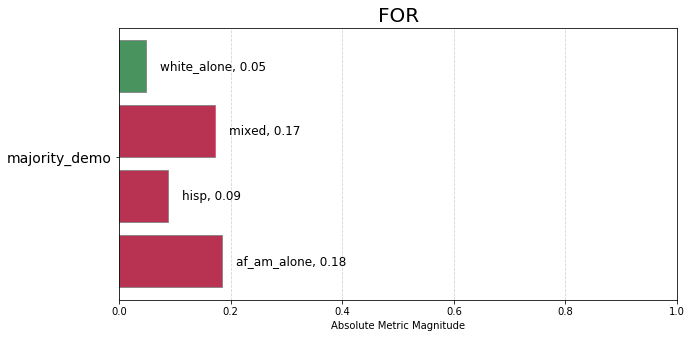

In [27]:
clf_cop.plot_fairness('for')

## Regression Model

In [28]:
params = {'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
_, reg_pred_df = pipeline.run_one_reg(
    train_df,
    test_df,
    'DTR',
    params,
    label_col='evictions',
    col_blacklist=['GEOID', 'year_evictions', 'label']
)

# Have to turn our predicted scores into a binary label
reg_pred_df = pipeline.label_df(
    reg_pred_df,
    14,
    label_col='pred_label',
    evictions_col='pred_evictions'
)

reg_cop = BiasCop(reg_pred_df, score_col='pred_label')
reg_cop.xtabs()

model_id, score_thresholds 1 {'rank_abs': [196]}


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,1,binary 0/1,196,majority_demo,af_am_alone,0.914894,0.983213,0.019139,0.075269,0.016787,0.085106,0.980861,0.924731,93,418,0.474490,0.181996,7,8,410,86,94,417,511,1336,0.183953
1,1,binary 0/1,196,majority_demo,hisp,0.600000,0.980769,0.037736,0.250000,0.019231,0.400000,0.962264,0.750000,4,53,0.020408,0.070175,1,2,51,3,5,52,57,1336,0.087719
2,1,binary 0/1,196,majority_demo,mixed,0.955224,0.953704,0.009615,0.189873,0.046296,0.044776,0.990385,0.810127,79,312,0.403061,0.202046,15,3,309,64,67,324,391,1336,0.171355
3,1,binary 0/1,196,majority_demo,white_alone,0.944444,0.991643,0.002801,0.150000,0.008357,0.055556,0.997199,0.850000,20,357,0.102041,0.053050,3,1,356,17,18,359,377,1336,0.047745


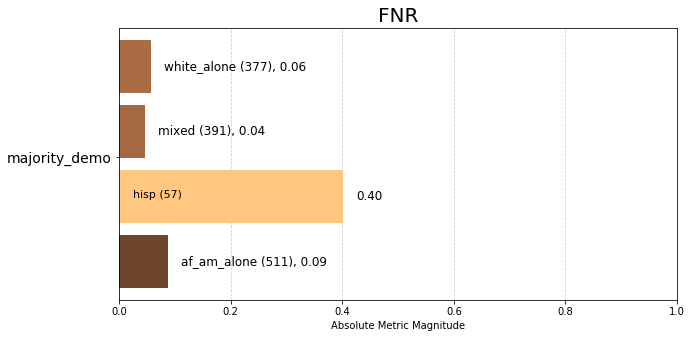

In [29]:
reg_cop.plot_group_metric('fnr')

get_disparity_predefined_group()


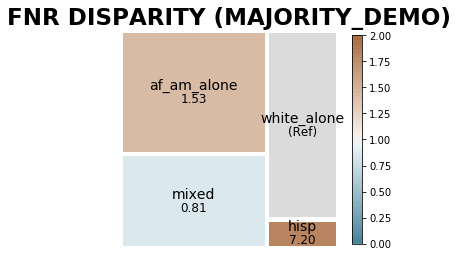

In [30]:
reg_cop.plot_disparity('fnr_disparity')

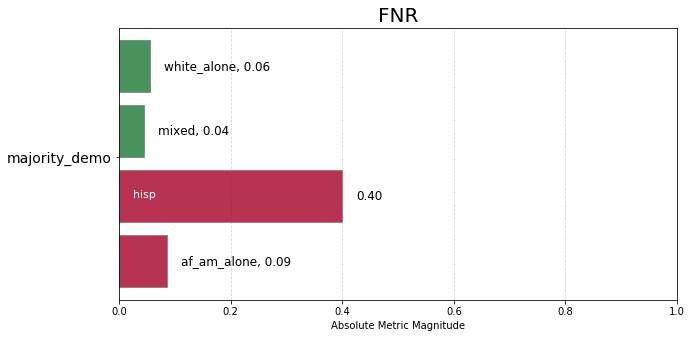

In [31]:
reg_cop.plot_fairness('fnr')

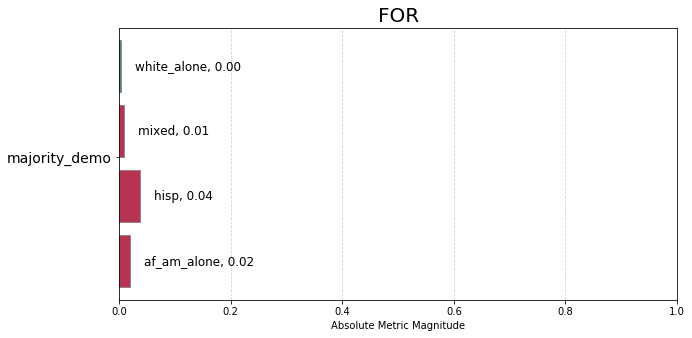

In [32]:
reg_cop.plot_fairness('for')